# Show the dataframe shape.

In [164]:
import pandas as pd

In [165]:
df=pd.read_csv(r'C:\Users\Benutzer1\Ironhack\Week_1\Day_2\Afternoon\lab-customer-analysis-round-2\files_for_lab\csv_files\marketing_customer_analysis.csv')


In [166]:
df.shape

(10910, 26)

In [167]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Standardize header names.

In [168]:
df.columns.unique()

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [169]:
df2=df.copy()

In [170]:
cols = []
for column in df2.columns:
    cols.append(column.lower())
df2.columns = cols

In [171]:
df2.columns.unique()


Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [172]:
def standerlize(x):
    if ( ' ' in x ):
        x = x.replace(" ","_")
    return x
standerlize('we can')

'we_can'

In [173]:
df2.columns = df2.columns.to_series().apply(standerlize)
df2.columns.unique()
df2=df2.drop('unnamed:_0',axis=1)

In [174]:
df2.columns.unique()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

# Which columns are numerical?

In [175]:
import numpy as np

In [176]:
df2.select_dtypes(np.number)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


# Which columns are catagorical?

In [177]:
df2.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [178]:
df2.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [179]:
df2[df2['vehicle_class'].isna()==True].head(60)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,14616,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,11432,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,89781,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,60546,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,31617,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
163,TP34946,California,5108.038755,No,Basic,College,1/9/11,Disabled,M,26784,...,0.0,8,Corporate Auto,Corporate L3,Offer3,Branch,482.400000,NaN,NaN,NaN
186,BG42047,Nevada,2511.944048,No,Basic,College,1/15/11,Medical Leave,M,17658,...,0.0,1,Personal Auto,Personal L3,Offer3,Web,312.000000,NaN,NaN,A
205,YZ19736,Arizona,2580.849899,Yes,Basic,College,2/9/11,Employed,M,46900,...,0.0,1,Personal Auto,Personal L2,Offer2,Web,316.800000,NaN,NaN,A
224,KL65897,California,6331.338496,No,Extended,Bachelor,2/21/11,Unemployed,F,0,...,0.0,3,Personal Auto,Personal L2,Offer1,Branch,94.714302,NaN,NaN,A
261,HZ56678,Oregon,2780.196856,No,Basic,High School or Below,1/12/11,Disabled,F,20261,...,0.0,1,Personal Auto,Personal L2,Offer4,Web,345.600000,NaN,NaN,A


In [180]:
df2 = df2[df2['state'].isna()==False]#after checking the missing value,the nan in state is also nan in response

In [181]:
df2 = df2[df2['months_since_last_claim'].isna()==False]#after checking the missing value,the nan in months_since_last_claim is also nan in number_of_open_complaints

In [182]:
df2 = df2[df2['vehicle_class'].isna()==False] #after checking the missing value,the nan in vehicle_class is also nan in vehicle_size
#So we just drop one of them then we've droped for all
#Since it's not a big amount so we just drop it directly
#But the nan in vehicle type is a lot,se we need to deal with it.
#Since it's a catagorical value so I decide to use the most frequent value to replace nan

In [183]:
df2.shape

(9134, 25)

In [184]:
display(df2.isna().sum())

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
vehicle_type                     4591
dtype: int64

In [185]:
df2['vehicle_type'].value_counts(dropna=False)

NaN    4591
A      4543
Name: vehicle_type, dtype: int64

In [186]:
df2['vehicle_type'] = df2['vehicle_type'].fillna('A')

In [187]:
df2['vehicle_type'].value_counts(dropna=False)

A    9134
Name: vehicle_type, dtype: int64

# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [188]:
df2['date'] = pd.to_datetime(df2['effective_to_date'])
df2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2011-02-18
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,2011-01-18
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,2011-02-14


In [189]:
df2[df2['date']<'2011-04-01']

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,date
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2011-02-18
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,2011-01-18
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2011-02-10
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,2011-01-11
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,2011-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,2011-01-07
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2011-02-24
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,2011-01-06
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2011-02-06


# EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

# Show DataFrame info.

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   object        
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status  

In [191]:
##Describe DataFrame.

In [192]:
df2.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Show a plot of the total number of responses.

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

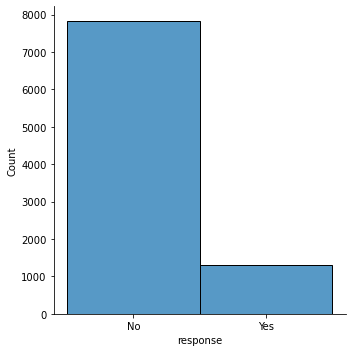

In [194]:
sns.displot(df2['response'])

# Show a plot of the response rate by the sales channel.

In [195]:
# !pip install seanborn --upgrade

In [196]:
#import seaborn as sns

#sns.__version__

In [197]:
# sns.histplot(x='sales_channel',hue='response',data=df2,stat='probability')

# Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Probability'>

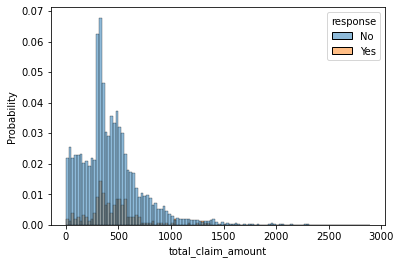

In [198]:
sns.histplot(x='total_claim_amount',hue='response',data=df2,stat='probability')

<AxesSubplot:xlabel='income', ylabel='Probability'>

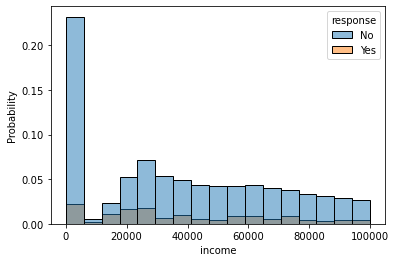

In [199]:
sns.histplot(x='income',hue='response',data=df2,stat='probability')

# round 4
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [200]:
df2.columns 
#data types are objects

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'date'],
      dtype='object')

In [201]:
numerical = df2.select_dtypes(np.number)

In [202]:
categoricals = df2.select_dtypes(np.object)

# Now we will try to check the normality of the numerical variables visually

In [203]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107


# Use seaborn library to construct distribution plots for the numerical variables

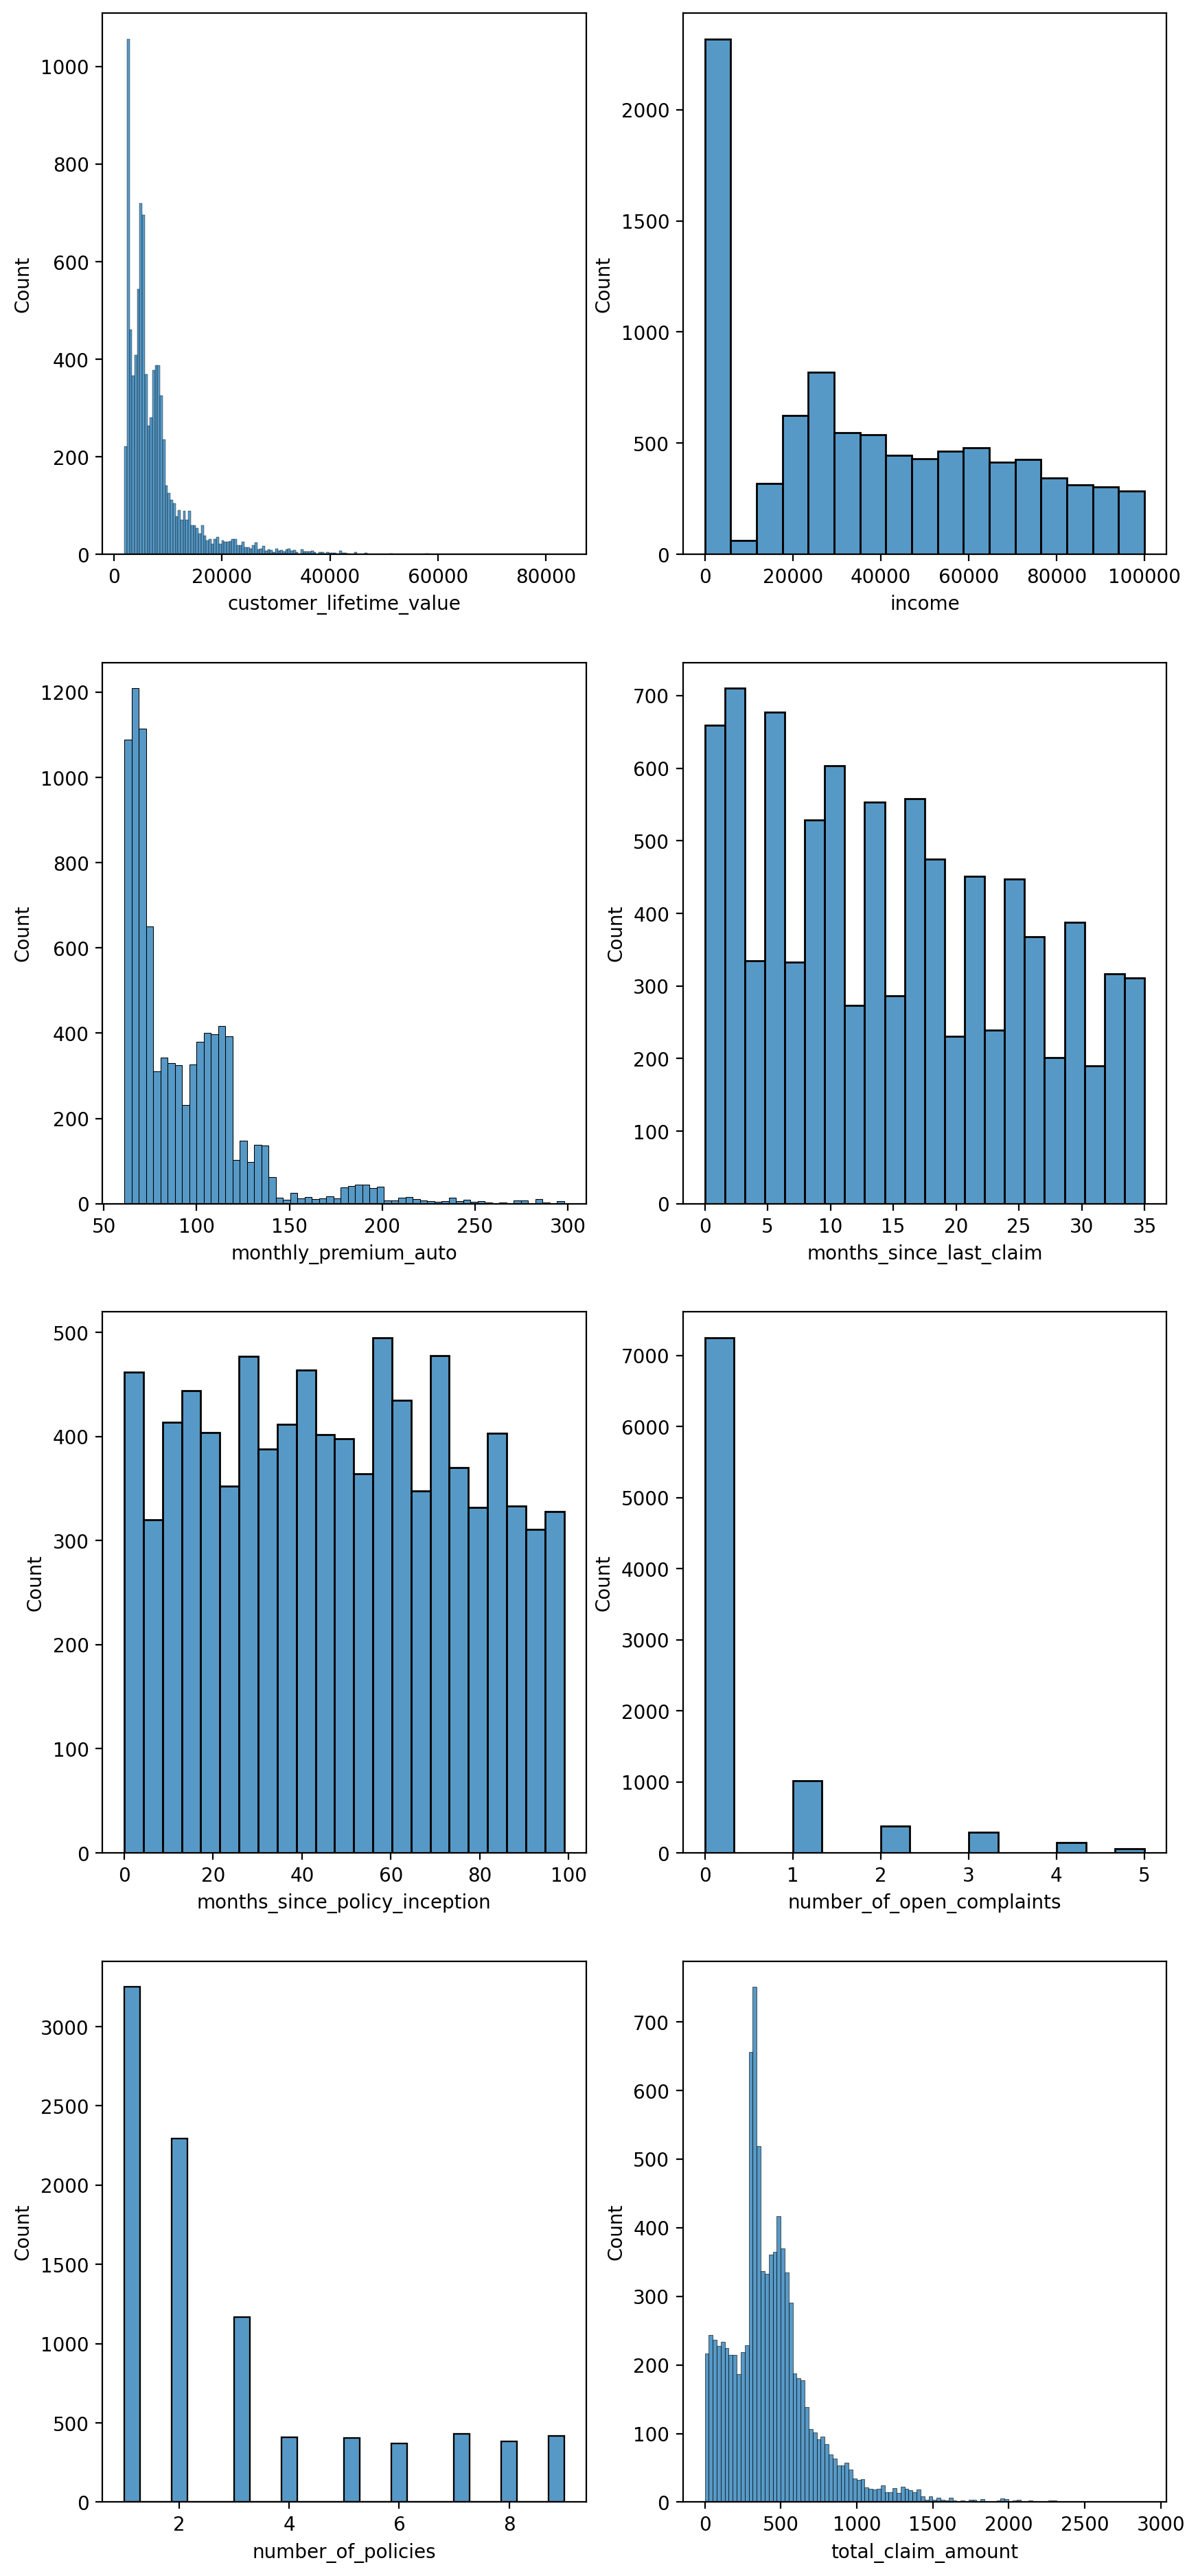

In [204]:
fig,axes = plt.subplots(4,2,figsize=(10,24),dpi=200)
sns.histplot(df2['customer_lifetime_value'],ax=axes[0,0])
sns.histplot(df2['income'],ax=axes[0,1])
sns.histplot(df2['monthly_premium_auto'],ax=axes[1,0])
sns.histplot(df2['months_since_last_claim'],ax=axes[1,1])
sns.histplot(df2['months_since_policy_inception'],ax=axes[2,0])
sns.histplot(df2['number_of_open_complaints'],ax=axes[2,1])
sns.histplot(df2['number_of_policies'],ax=axes[3,0])
sns.histplot(df2['total_claim_amount'],ax=axes[3,1])

plt.show()


# Use Matplotlib to construct histograms

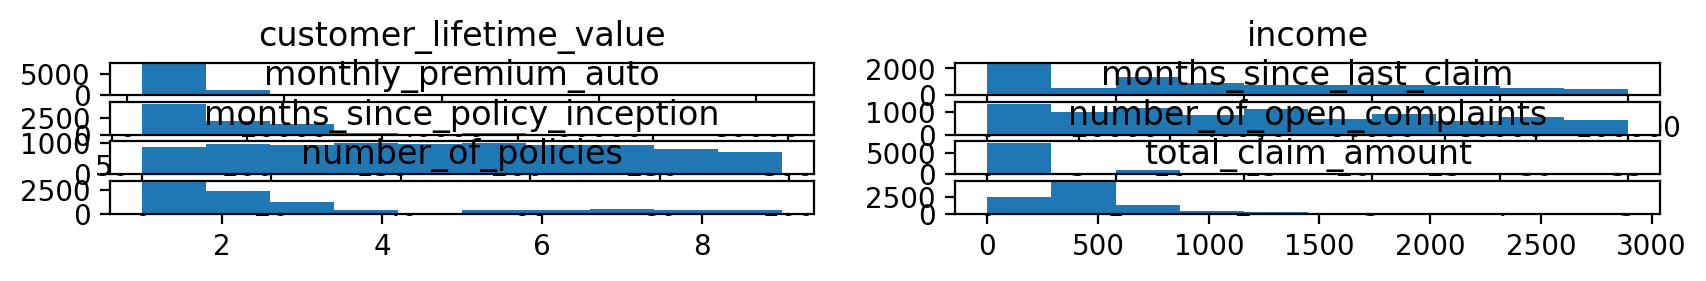

In [205]:
fig,axes = plt.subplots(4,2,figsize=(10,1),dpi=200)
axes[0,0].hist(df2['customer_lifetime_value'])
axes[0,0].set_title('customer_lifetime_value')
axes[0,1].hist(df2['income'])
axes[0,1].set_title('income')
axes[1,0].hist(df2['monthly_premium_auto'])
axes[1,0].set_title('monthly_premium_auto')
axes[1,1].hist(df2['months_since_last_claim'])
axes[1,1].set_title('months_since_last_claim')
axes[2,0].hist(df2['months_since_policy_inception'])
axes[2,0].set_title('months_since_policy_inception')
axes[2,1].hist(df2['number_of_open_complaints'])
axes[2,1].set_title('number_of_open_complaints')
axes[3,0].hist(df2['number_of_policies'])
axes[3,0].set_title('number_of_policies')
axes[3,1].hist(df2['total_claim_amount'])
axes[3,1].set_title('total_claim_amount')

plt.show()

# Do the distributions for different numerical variables look like a normal distribution

In [206]:
#No,none of them looks like normal distribution

# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [207]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = numerical.columns
vif["vif_Factor"] = [variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])]
vif

,features,vif_Factor
0,customer_lifetime_value,2.806978
1,income,2.831329
2,monthly_premium_auto,14.130566
3,months_since_last_claim,2.784766
4,months_since_policy_inception,3.267760
5,number_of_open_complaints,1.166620
6,number_of_policies,2.299313
7,total_claim_amount,6.666879


In [208]:
#just another way to check the multicollinearity of each independent variables with VIF
#If the vif factor is higher than 10,we may connsider is variable have a high correlation with other independent variables
#but we ingore it here,as it depends on the requirements and constraints

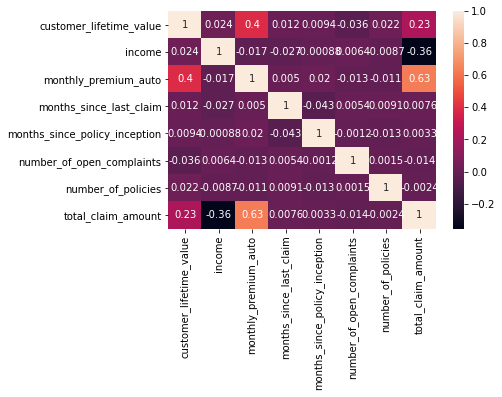

In [209]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [210]:
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [211]:
#As showen  in the heatmap,no two features show a high correlation here,so we drop nothing